# Randomness and Probability

In this tutorial we will cover ways to generate random numbers in numpy following the uniform random distribution, and the normal distribution. We'll also look at an example using conditional probability and Bayes' rule.

## Random Number Generation

Numpy has a variety of functions for generating arrays of random numbers following a range of different distributions. Some commonly used ones will be introduced below:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

`random.rand()` draws samples from a uniform random distribution, in the range [0, 1).

Text(0.5, 1.0, '100000 samples from uniform random distribution')

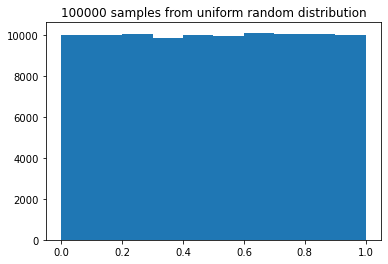

In [7]:
n_samples = 100000
uniform_rand = np.random.rand(n_samples)
plt.hist(uniform_rand)
plt.title("%d samples from uniform random distribution" % n_samples)

Note that we can easily modify this distribution to get uniform random numbers in other ranges. For examples, suppose we want numbers drawn from a uniform random distribution over [-4, 5):

Text(0.5, 1.0, '100000 samples from uniform random distribution')

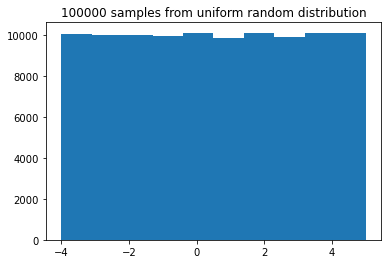

In [8]:
n_samples = 100000
uniform_rand = (np.random.rand(n_samples) * 9) - 4
plt.hist(uniform_rand)
plt.title("%d samples from uniform random distribution" % n_samples)

`random.randn()` draws from the normal distribution with mean 0 and standard deviation 1:

Text(0.5, 1.0, '100000 samples from normal random distribution')

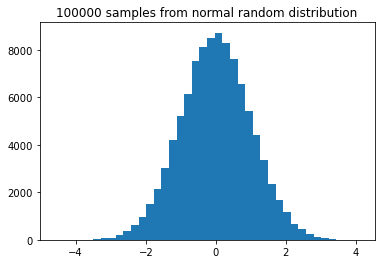

In [11]:
n_samples = 100000
normal_rand = np.random.randn(n_samples)
plt.hist(normal_rand, 40)
plt.title("%d samples from normal random distribution" % n_samples)

Again this can be scaled to give other normal distributions, for example if we want mean 9 and standard deviation 3:

Text(0.5, 1.0, '100000 samples from normal random distribution')

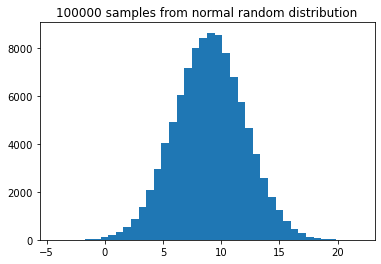

In [12]:
n_samples = 100000
normal_rand = (np.random.randn(n_samples) * 3) + 9
plt.hist(normal_rand, 40)
plt.title("%d samples from normal random distribution" % n_samples)

Numpy has other functions for a variety of different distributions in the `numpy.random` module (see the [documentation](https://numpy.org/devdocs/reference/random/) for more details).

Note that most of these have a different function signature, taking a `size` parameter. For example, for the Poisson distribution:

Text(0.5, 1.0, '100000 samples from poisson random distribution')

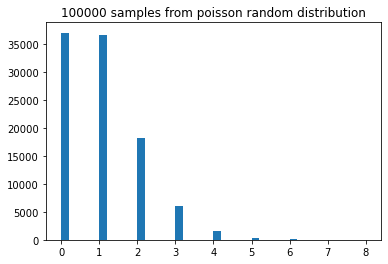

In [15]:
n_samples = 100000
poisson_rand = np.random.poisson(size=(n_samples,))
plt.hist(poisson_rand, 40)
plt.title("%d samples from poisson random distribution" % n_samples)

## Conditional Probability

In this section we will cover a common example used to demonstrate the importance of conditional probability, screening a population for a disease, using a medical test.

Suppose a medical test is applied to all members of a population, to try to identify all people who have a certain disease. 

The disease is fairly rare in the population, with only 1% of the population having the disease. 

The test is 90% accurate, meaning that if someone has the disease and is tested, it will give a positive result 90% of the time. Also, if someone doesn't have the disease and is tested, it will again give the right result 90% of the time.

In the example below we run a simulation with a population size of 1000, to see what the results of the screening might be. Note that when a patient is tested, there are 4 possible outcomes:

1. They have the disease, and test positive (a true positive result).
2. They don't have the disease, and test positive (a false positive result).
3. They don't have the disease, and test negative (a true negative result).
4. They have the disease, and test negative (a false negative result).

In [35]:
disease_incidence = 0.01
test_accuracy = 0.9

population_size = 1000

# First we create a random vector of length 1000, containing True where each person has the disease, and False where they do not.
# Remember that np.random.rand() generates numbers following a uniform distribution in the range [0, 1).
rand_vector = np.random.rand(population_size) 
has_disease = rand_vector < disease_incidence # The output of this is a boolean array (an array of True and False values).

# Now we do the same, but this time make a vector which is True where the test gives the correct result, and False otherwise.
rand_vector = np.random.rand(population_size)
test_correct = rand_vector < test_accuracy

# Now we can work out the number of true & false positive & negative results.
# Since the arrays contain boolean values, we use the numpy functions logical_and and logical_not, which apply
# these boolean operators to the arrays element-wise.
true_positives = np.logical_and(has_disease, test_correct)
false_positives = np.logical_and(np.logical_not(has_disease), np.logical_not(test_correct))
true_negatives = np.logical_and(np.logical_not(has_disease), test_correct)
false_negatives = np.logical_and(has_disease, np.logical_not(test_correct))

# Here count_nonzero() counts the number of True entries in each array.
print("True positives:", np.count_nonzero(true_positives))
print("False positives:", np.count_nonzero(false_positives))
print("True negatives:", np.count_nonzero(true_negatives))
print("False negatives:", np.count_nonzero(false_negatives))

print("Proportion of people who tested positive that were actually ill:", np.count_nonzero(true_positives) / (np.count_nonzero(false_positives) + np.count_nonzero(true_positives)))

True positives: 10
False positives: 102
True negatives: 887
False negatives: 1
Proportion of people who tested positive that were actually ill: 0.08928571428571429


As you can see, this test gave a lot of false positive results. As a result it isn't helpful on its own in determining if someone has the disease, because the majority of people who test positive do not have it.

Try changing the values in the code above to see what test accuracy or incidence is required to give better results.

Rather than running a simulation like this, we could have instead used Bayes' rule. We're interested in the conditional probability that someone has the disease, given that they tested positive.

Using Bayes' rule:

P(disease | positive) = P(disease n positive) / P(positive)

To work out P(positive), we add the probabilities of the two possibilities P(disease n positive) + P(no_disease n positive).

Writing this out in code gives the result below:

In [36]:
disease_incidence = 0.01
test_accuracy = 0.9

prob_disease_given_positive = disease_incidence * test_accuracy / (disease_incidence * test_accuracy + (1 - disease_incidence) * (1 - test_accuracy))

print("Probability someone has the disease, given they tested positive:", prob_disease_given_positive)

Probability someone has the disease, given they tested positive: 0.08333333333333336


The result here should be similar to the proportion you obtained in the simulation result above. Try increasing the population size - the larger it is, the closer you should get to this ideal result each time you run the example.

### Exercise: Plotting Bayes' Rule

Use the code above to plot a 2D heightfield of P(disease | positive), as a function of disease incidence and test accuracy, to better understand how they contribute to the usefulness of the test. Look back at the code from notebook 5 if you need a reminder of how to do this.

Also use the same data to plot a 2D false-colour plot, this time using `plt.imshow()` and `plt.colorbar()` - look back at notebook 6 for examples using these functions.

In [ ]:
# Plot the 3D heighfield
# Your code here..

In [ ]:
# Show the 2D false-colour plot
# Your code here...